In [1]:
# Importing the required libraries and data

In [ ]:
# split the folders

In [2]:
!pip install split_folders

  Obtaining dependency information for split_folders from https://files.pythonhosted.org/packages/b6/d5/307d63c03356bad6e141d8718d3f4116f51bd9c4b09e2614ffcee1f3c6fd/split_folders-0.5.1-py3-none-any.whl.metadata


In [3]:
import splitfolders

In [ ]:
input_folder='plantvillage dataset/color'
output='plantvillage dataset/plant_data'
splitfolders.ratio(input_folder,output,seed=42,ratio=(.6,.2,.2))

In [ ]:
# Importing the required libraries

In [1]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions,ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D,Conv2D,MaxPool2D,Dense,BatchNormalization,Flatten
import numpy as np

In [ ]:
# preprocessing the data

In [2]:
train_data_generator=ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=True,preprocessing_function=preprocess_input,validation_split=0.2)

In [ ]:
# Fix the size of the image

In [3]:
img_height,img_width=(224,224)

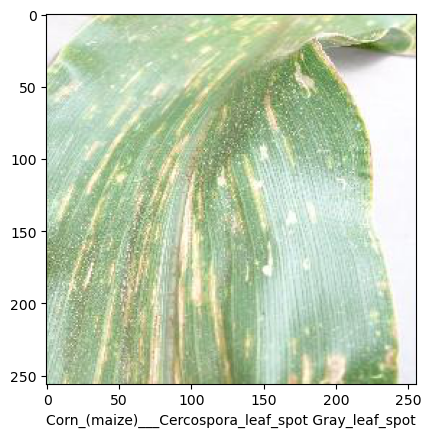

In [4]:
# plot the image using matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img=mpimg.imread('plantvillage dataset/plant_data/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/2bfff79a-08ce-4f07-a059-465326ef2ea2___RS_GLSp 4436.JPG')
plt.xlabel('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot')
plt.imshow(img)

In [4]:
# train_generator
train_generator=train_data_generator.flow_from_directory(directory='plantvillage dataset/plant_data/train', target_size=(img_height, img_width),class_mode='categorical',
    batch_size=32,subset='training')

Found 26070 images belonging to 38 classes.


In [5]:
# valid generator
val_generator=train_data_generator.flow_from_directory(directory='plantvillage dataset/plant_data/val', target_size=(img_height, img_width),class_mode='categorical',
    batch_size=32,subset='validation')

Found 2158 images belonging to 38 classes.


In [6]:
# test_generator
test_generator=train_data_generator.flow_from_directory(directory='plantvillage dataset/plant_data/test', target_size=(img_height, img_width),class_mode='categorical',
    batch_size=1,subset='validation')

Found 2165 images belonging to 38 classes.


In [7]:

# Training the model
model=ResNet50(input_shape=(224,224,3),include_top=False,weights='imagenet',classes=38)
x=model.output
x=GlobalAveragePooling2D()(x)
x=Dense(units=1024,activation='relu')(x)
predictions=Dense(train_generator.num_classes,activation='softmax')(x)
final_model=Model(inputs=model.input,outputs=predictions)

for layer in model.layers:
    layer.trainable=False
final_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 25,724,838 (98.13 MB)

 Trainable params: 2,137,126 (8.15 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [8]:
final_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
final_model

<Functional name=functional_2, built=True>

In [9]:
history=final_model.fit(train_generator,epochs=2)

Epoch 1/2


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


815/815 ━━━━━━━━━━━━━━━━━━━━ 2803s 3s/step - accuracy: 0.8156 - loss: 0.7304
Epoch 2/2
815/815 ━━━━━━━━━━━━━━━━━━━━ 2903s 4s/step - accuracy: 0.9554 - loss: 0.1338


Text(0, 0.5, 'loss')

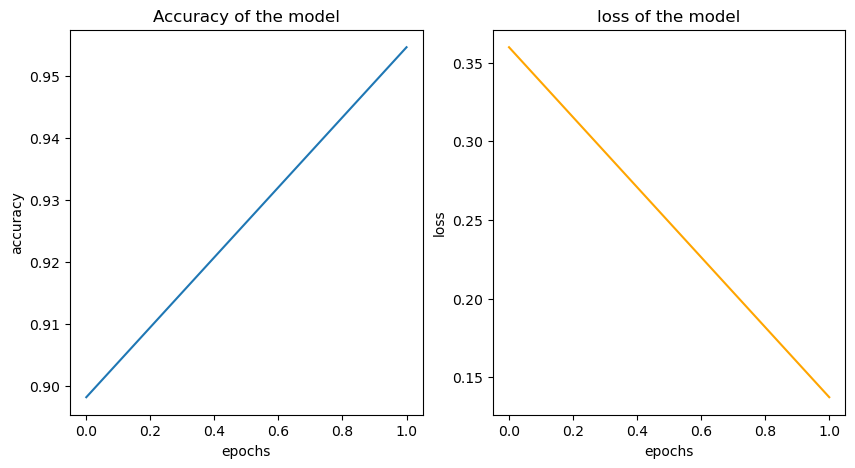

In [23]:
# plot the history of training and loss of the Resnet50 model
# plt.figure(figsize=(50,30))
import matplotlib.pyplot as plt
# plt.title('Accuracy of the model')
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axes[0].plot(history.history['accuracy'])
axes[0].title.set_text('Accuracy of the model')
axes[0].set_xlabel('epochs')
axes[0].set_ylabel('accuracy')


axes[1].plot(history.history['loss'],color='orange')
axes[1].title.set_text('loss of the model')
axes[1].set_xlabel('epochs')
axes[1].set_ylabel('loss')





In [42]:
#test the model
test_loss,test_accuracy=final_model.evaluate(test_generator,verbose=2)
print('test_accuracy:',test_accuracy)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2165/2165 - 434s - 200ms/step - accuracy: 0.9478 - loss: 0.1747
test_accuracy: 0.9478060007095337


In [ ]:
# experiment the images

In [77]:
def prediction(model,image_path,class_indices):
    img=cv2.imread(image_path)
    img_resized=cv2.resize(img,(224,224))
    img=np.expand_dims(img_resized,axis=0)
    pred=final_model.predict(img)
    predictions=class_indices[np.argmax(pred)]
    return predictions
image_path ='plantvillage dataset/plant_data/test/Corn_(maize)___Common_rust_/RS_Rust 1564.JPG'
print(prediction(plant_model,image_path,class_indices))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step
Corn_(maize)___Common_rust_


In [73]:

# !pip install opencv-python
import cv2 
import numpy as np
# image_path='plantvillage dataset/plant_data/test/Grape___Black_rot/00cab05d-e87b-4cf6-87d8-284f3ec99626___FAM_B.Rot 3244.JPG'
image_path ='plantvillage dataset/plant_data/test/Corn_(maize)___Common_rust_/RS_Rust 1564.JPG'
img=cv2.imread(image_path)
img_resized=cv2.resize(img,(224,224))
img=np.expand_dims(img_resized,axis=0)
# img.shape


(1, 224, 224, 3)

In [39]:
pred=final_model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


In [40]:
pred

array([[5.8645551e-04, 3.1038928e-07, 3.4534466e-08, 5.0233312e-02,
        6.1411638e-04, 6.6362877e-06, 1.4852789e-06, 4.8300815e-05,
        8.7653708e-01, 6.5573879e-02, 1.9672860e-05, 3.9413908e-10,
        2.8338164e-08, 2.3269637e-09, 3.7514770e-08, 2.4866525e-03,
        2.5667075e-07, 9.5890643e-04, 8.7856397e-04, 1.7398163e-03,
        1.6368192e-07, 6.9774037e-06, 1.2399032e-07, 1.2987856e-11,
        1.4852328e-07, 2.1851789e-04, 5.1695437e-08, 2.7036305e-05,
        1.7979973e-09, 4.7458241e-07, 5.4431028e-05, 1.1149959e-08,
        2.3237359e-08, 1.1562314e-06, 1.8580865e-08, 1.8313383e-09,
        1.1991783e-13, 5.4887782e-06]], dtype=float32)

In [27]:
# create a mapping from class indices to class names
class_indices={v:k for k,v in test_generator.class_indices.items()}

In [13]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [41]:
class_indices[np.argmax(pred)]

'Corn_(maize)___Common_rust_'

In [74]:
# save the model
final_model.save('plantvillage dataset/plant_data/plant_model.h5')

In [76]:
# load the pretrained model
from keras.models import load_model
plant_model = load_model('plantvillage dataset/plant_data/plant_model.h5')


In [31]:
image_path='plantvillage dataset/plant_data/test/Grape___Black_rot/00cab05d-e87b-4cf6-87d8-284f3ec99626___FAM_B.Rot 3244.JPG'

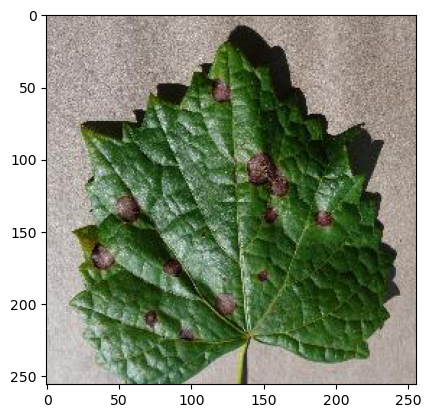

In [21]:
image=Image.open(image_path)
plt.imshow(image)

In [11]:
import json
# dump class indices to json
json.dump(class_indices,open('class_indices.json','w'))